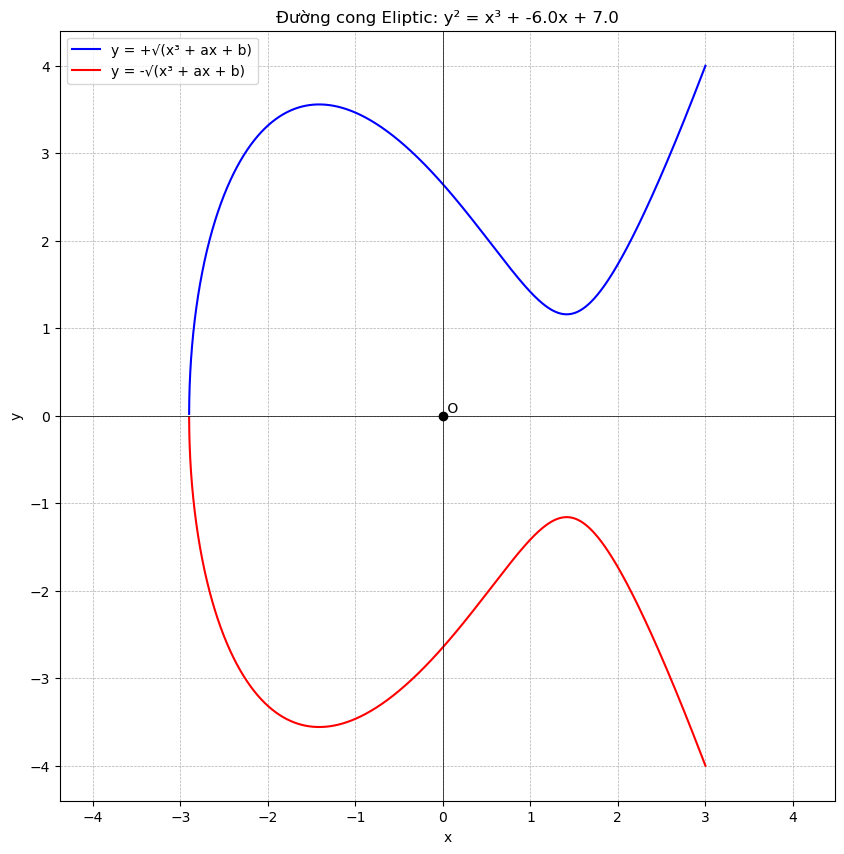

In [1]:
import numpy as np # numpy xử lý dữ liệu số
import matplotlib.pyplot as plt # matplotlib.pyplot vẽ đồ thị


def draw_elliptic_curve(a, b): # Hàm vẽ

    x = np.linspace(-3, 3, 200000) # Không thể vẽ vô hạn. Chỉ lấy đại diện khoảng x = [-3;3] với 200000 giá trị cách đều trong đó.
    y2 = x**3 + a*x + b

    valid_x = x[y2 >= 0]
    valid_y2 = y2[y2 >= 0] # Chọn các giá trị để y^2 >= 0

    y_positive = np.sqrt(valid_y2) # Nhanh tren
    y_negative = -y_positive # Nhanh duoi

    # Vẽ đồ thị (Chưa gắn Oxy), Label
    plt.figure(figsize=(10, 10))
    plt.plot(valid_x, y_positive, 'blue', label="y = +√(x³ + ax + b)")
    plt.plot(valid_x, y_negative, 'red', label="y = -√(x³ + ax + b)")

    # Gắn Oxy
    O = (0, 0) # Gốc tọa độ
    plt.scatter(*O, color="black", zorder=3)
    plt.text(O[0], O[1], ' O', fontsize=10, verticalalignment='bottom')
    
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.title(f"Đường cong Eliptic: y² = x³ + {a}x + {b}")
    plt.legend()
    plt.show()

a = float(input("Hệ số a: "))
b = float(input("Hệ số b: "))

draw_elliptic_curve(a, b)


C:\Users\QBC\AppData\Local\Temp\ipykernel_6524\2855289494.py:49: RuntimeWarning: invalid value encountered in sqrt
  y_vals = np.sqrt(x_vals**3 + a*x_vals + b)


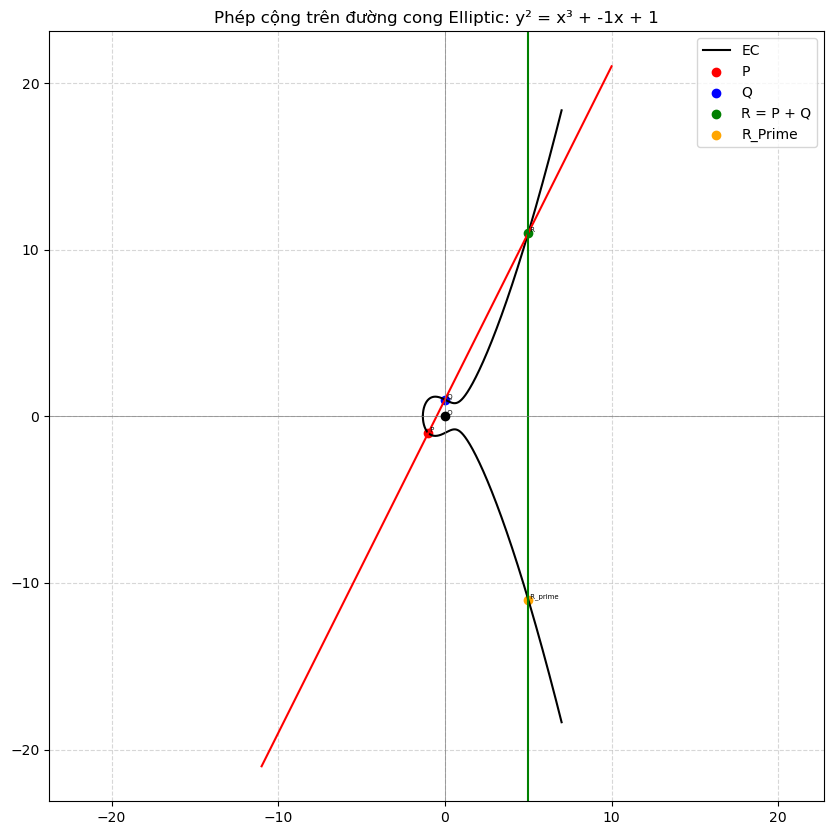

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class EllipticCurve: #Khởi tạo đường cong elliptic
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def is_on_curve(self, x, y): #Kiểm tra xem điểm (x, y) có nằm trên đường cong không
        return y**2 == x**3 + self.a * x + self.b

    def add(self, P, Q): # Ham cong EC
        if P is None: # P vo cuc
            return Q
        if Q is None: # Q vo cuc
            return P

        x1, y1 = P
        x2, y2 = Q

        if x1 == x2 and y1 == -y2: # Doi nhau, Tong = Vo cuc
            return None

        if P == Q: 
            if y1 == 0: # Phep nhan doi
                return None
            s = (3 * x1**2 + self.a) / (2 * y1)
        else:
            s = (y2 - y1) / (x2 - x1) # Normal

        x3 = s**2 - x1 - x2
        y3 = s * (x1 - x3) - y1

        return (round(x3, 3), round(-y3, 3))  # Trả về điểm R,  Lam tron 3 CSTP

def draw_elliptic_curve_with_addition(a, b, P, Q):
    curve = EllipticCurve(a, b)
    
    R = curve.add(P, Q)
    if R is None:
        print("P + Q = O (Điểm vô cực)")
        return
    
    # Điểm đối xứng R_Prime của R qua Ox
    R_prime = (R[0], -R[1])

    # Vẽ đường cong
    x_vals = np.linspace(-7, 7, 200000)
    y_vals = np.sqrt(x_vals**3 + a*x_vals + b)
    
    plt.figure(figsize=(10, 10))
    plt.plot(x_vals, y_vals, label="EC", color="black")
    plt.plot(x_vals, -y_vals, color="black")

    # Vẽ P, Q, R và R_Prime
    plt.scatter(*P, color="red", label="P")
    plt.text(P[0], P[1], ' P', fontsize=5, verticalalignment='bottom') 

    plt.scatter(*Q, color="blue", label="Q")
    plt.text(Q[0], Q[1], ' Q', fontsize=5, verticalalignment='bottom')

    plt.scatter(*R, color="green", label="R = P + Q")
    plt.text(R[0], R[1], ' R', fontsize=5, verticalalignment='bottom')

    plt.scatter(*R_prime, color="orange", label="R_Prime")
    plt.text(R_prime[0], R_prime[1], ' R_prime', fontsize=5, verticalalignment='bottom')

    # PTĐT PQ
    x_line = np.linspace(min(P[0], Q[0]) - 10, max(P[0], Q[0]) + 10, 10000) # Tạo một dãy giá trị x cho đường thẳng đi qua P va Q. Lay min cua hoanh do keo dai ra ben trai 10; max cua hoanh do keo dai ra ben phai 10, 10000 GT x
    y_line = ((Q[1] - P[1]) / (Q[0] - P[0])) * (x_line - P[0]) + P[1] # y theo x
    plt.plot(x_line, y_line, linestyle="-", color="red", alpha=1) #alpha: Độ trong suốt
    plt.axvline(x=R[0], color='green', linestyle='-', linewidth=1.5) # PTĐT R-R_Prime

    # Định dạng Oxy
    O = (0, 0) # Gốc tọa độ
    plt.scatter(*O, color="black", zorder=3)
    plt.text(O[0], O[1], ' O', fontsize=5, verticalalignment='bottom')
    
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.axis("equal")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.title(f"Phép cộng trên đường cong Elliptic: y² = x³ + {a}x + {b}")
    plt.show()

# Sample Data
a, b = -1, 1
P = (-1, -1)
Q = (0, 1)

draw_elliptic_curve_with_addition(a, b, P, Q)


Điểm P(-1.0, -1.0) thuộc đường cong.


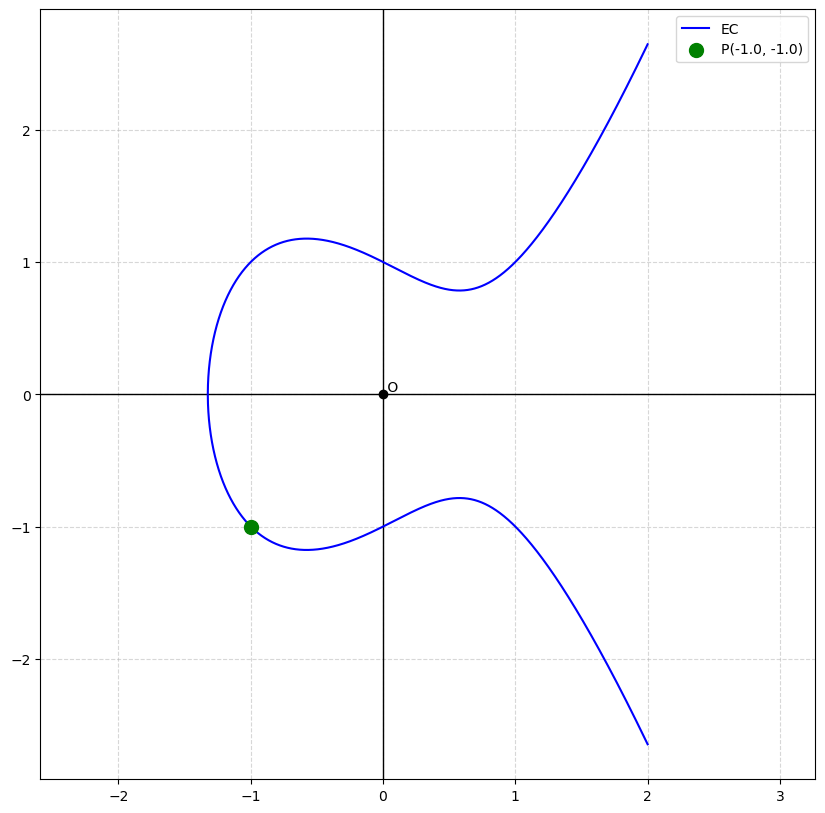

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class EllipticCurve:
    def __init__(self, a, b):
        # Khởi tạo đường cong elliptic
        self.a = a
        self.b = b

    def is_on_curve(self, x, y):
        # Kiểm tra xem điểm (x, y) có nằm trên đường cong không
        return y**2 == x**3 + self.a * x + self.b

    def plot_curve(self, x_range=(-2, 2)):
        # Vẽ đường cong elliptic trong khoảng x xác định (Nhập tay)
        x_vals = np.linspace(x_range[0], x_range[1], 50000)
        y_squared = x_vals**3 + self.a * x_vals + self.b

        
        plt.figure(figsize=(10, 10))
        plt.axhline(0, color='black', linewidth=1)  # Trục Ox
        plt.axvline(0, color='black', linewidth=1)  # Trục Oy
        plt.axis("equal")
        plt.grid(True, linestyle='--', alpha=0.5)

        O = (0, 0) # Gốc tọa độ
        plt.scatter(*O, color="black", zorder=5)
        plt.text(O[0], O[1], ' O', fontsize=10, verticalalignment='bottom')

        # Vẽ đường cong
        valid_x = x_vals[y_squared >= 0]  # Chỉ lấy phần có căn thực
        valid_y = np.sqrt(y_squared[y_squared >= 0])

        plt.plot(valid_x, valid_y, 'blue', label="EC")  # Nhánh dương
        plt.plot(valid_x, -valid_y, 'blue')  # Nhánh âm

    def plot_point(self, x, y):
        #Vẽ điểm (x, y) lên đồ thị và kiểm tra
        color = 'green' if self.is_on_curve(x, y) else 'red'
        plt.scatter(x, y, color=color, zorder=3, s=100, label=f"P({x}, {y})")

        if color == 'red':
            print(f"Điểm P({x}, {y}) KHÔNG thuộc đường cong.")
        else:
            print(f"Điểm P({x}, {y}) thuộc đường cong.")

    def show(self):
        plt.legend()
        plt.show()

a = float(input("Hệ số a: "))
b = float(input("Hệ số b: "))
x = float(input("Tọa độ x của điểm P: "))
y = float(input("Tọa độ y của điểm P: "))

curve = EllipticCurve(a, b)
curve.plot_curve()
curve.plot_point(x, y)
curve.show()


P = (-1, 1)
Q = (0, 1)
P + Q = R = (1.0, -1.0)
2P = (3.0, -5.0)
3P = (0.25, 0.875)


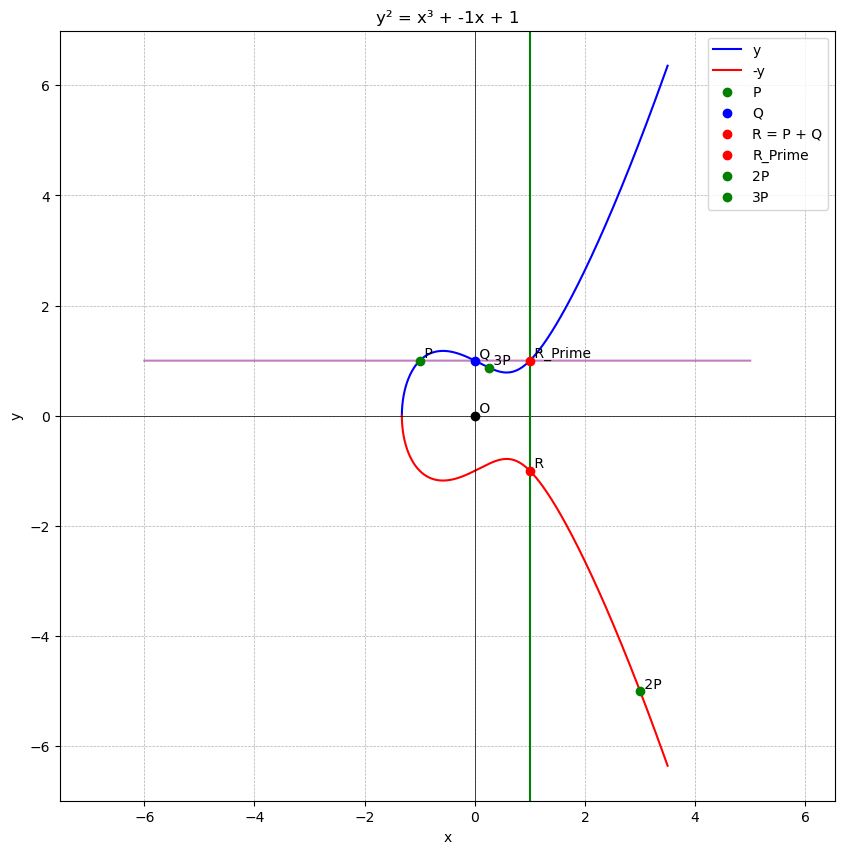

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class EllipticCurve:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def is_on_curve(self, x, y):
        # Kiểm tra xem điểm (x, y) có thuộc đường cong không
        return y**2 == x**3 + self.a * x + self.b

    def inverse(self, P):
        # Nghịch đảo của điểm P = (x, y) là (x, -y)
        if P is None:
            return None
        x, y = P
        return (x, -y)

    def add(self, P, Q):
        # Cộng hai điểm P và Q trên đường cong elliptic
        if P is None:
            return Q
        if Q is None:
            return P
        
        x1, y1 = P
        x2, y2 = Q

        if x1 == x2 and y1 == -y2:
            return None  # P + (-P) = O

        if P == Q:
            # Công thức nhân đôi điểm
            if y1 == 0:
                return None
            s = (3 * x1**2 + self.a) / (2 * y1)
        else:
            # Công thức cộng điểm khác nhau
            s = (y2 - y1) / (x2 - x1)

        x3 = s**2 - x1 - x2
        y3 = s * (x1 - x3) - y1

        return (round(x3, 3), round(y3, 3))  # Làm tròn 3 CSTP

    def multiply(self, P, n): # Dịch bit O(log(n))
        # Nhân điểm P với số nguyên n: nP = P + P + ... + P (n lần) 
        result = None  # Tương đương điểm O (Điểm vô cực)
        temp = P

        while n:
            if n & 1:  # Nếu bit cuối của n là 1
                result = self.add(result, temp) # Result = Result + Temp
            temp = self.add(temp, temp)  # Temp = 2 * Temp
            n >>= 1  # Chia n cho 2

        return result


def draw_elliptic_curve(a, b, P=None, Q=None, R=None):

    # Vẽ đường cong elliptic
    x = np.linspace(-3.5, 3.5, 500000) # Range minh họa của x
    y2 = x**3 + a*x + b
    valid_mask = y2 >= 0  # Chỉ lấy giá trị y hợp lệ
    
    x_valid = x[valid_mask]
    y_valid = np.sqrt(y2[valid_mask])

    plt.figure(figsize=(10, 10))
    plt.plot(x_valid, y_valid, 'blue', label="y") # Nhánh dương
    plt.plot(x_valid, -y_valid, 'red', label="-y") # Nhánh âm
    plt.axhline(0, color="black", linewidth=0.5)
    plt.axvline(0, color="black", linewidth=0.5)

    O = (0, 0) # Gốc tọa độ
    plt.scatter(*O, color="black", zorder=3)
    plt.text(O[0], O[1], ' O', fontsize=10, verticalalignment='bottom')

    # Vẽ 6 điểm P - Q - R - R_Prime - P2 (2P) - P3 (3P)
    R_prime = (R[0], -R[1]) # Đối xứng Ox
    if P:
        plt.scatter(*P, color="green", label="P", zorder=3)
        plt.text(P[0], P[1], ' P', fontsize=10, verticalalignment='bottom')
    if Q:
        plt.scatter(*Q, color="blue", label="Q", zorder=3)
        plt.text(Q[0], Q[1], ' Q', fontsize=10, verticalalignment='bottom')
    if R:
        plt.scatter(*R, color="red", label="R = P + Q", zorder=3)
        plt.text(R[0], R[1], ' R', fontsize=10, verticalalignment='bottom')
    if R_prime:
        plt.scatter(*R_prime, color="red", label="R_Prime", zorder=3)
        plt.text(R[0], -R[1], ' R_Prime', fontsize=10, verticalalignment='bottom')    
    if P2:
        plt.scatter(*P2, color="green", label="2P", zorder=3)
        plt.text(P2[0], P2[1], ' 2P', fontsize=10, verticalalignment='bottom')
    if P3:
        plt.scatter(*P3, color="green", label="3P", zorder=3)
        plt.text(P3[0], P3[1], ' 3P', fontsize=10, verticalalignment='bottom')
    
    # Phương trình đường thẳng PQ - Phương trình đường thẳng R_Prime - R (Chính là x = R[0] hoặc R_Prime[0])
    x_line = np.linspace(min(P[0], Q[0]) - 5, max(P[0], Q[0]) + 5, 10000) # Tạo một dãy giá trị x cho đường thẳng đi qua P va Q. Lay min cua hoanh do keo dai ra ben trai 5; max cua hoanh do keo dai ra ben phai 5, 10000 GT x
    y_line = ((Q[1] - P[1]) / (Q[0] - P[0])) * (x_line - P[0]) + P[1] # y theo x
    plt.plot(x_line, y_line, linestyle="-", color="purple", alpha=0.5) #alpha: Độ trong suốt
    plt.axvline(x=R[0], color='green', linestyle='-', linewidth=1.5) # Phương trình đường thẳng R_Prime - R

    # Final - Vẽ hoàn chỉnh đồ thị
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.axis("equal")
    plt.title(f"y² = x³ + {a}x + {b}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


# VD minh họa
a, b = -1, 1
curve = EllipticCurve(a, b)

P = (-1, 1)
Q = (0, 1)

if curve.is_on_curve(*P) and curve.is_on_curve(*Q): # Nếu không thuộc E thì nhảy ra Else luôn
    R = curve.add(P, Q)  # P + Q
    P2 = curve.multiply(P, 2)  # 2P
    P3 = curve.multiply(P, 3)  # 3P

    print(f"P = {P}")
    print(f"Q = {Q}")
    print(f"P + Q = R = {R}")
    print(f"2P = {P2}")
    print(f"3P = {P3}")

    # Vẽ tất cả mọi thứ có trong hàm
    draw_elliptic_curve(a, b, P, Q, R)
else:
    print("Điểm P hoặc Q không thuộc đường cong!")


C:\Users\QBC\AppData\Local\Temp\ipykernel_6524\160835052.py:58: RuntimeWarning: invalid value encountered in sqrt
  y_vals = np.sqrt(x_vals**3 + a*x_vals + b)


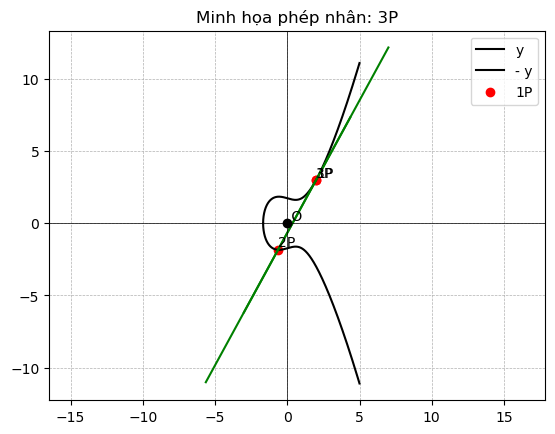

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class EllipticCurve:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def is_on_curve(self, P):
        # Kiểm tra xem điểm P có nằm trên đường cong không
        if P is None:
            return True
        x, y = P
        return y**2 == x**3 + self.a * x + self.b

    def add(self, P, Q):
        # Cộng hai điểm P và Q trên đường cong elliptic
        if P is None:
            return Q
        if Q is None:
            return P
        
        x1, y1 = P
        x2, y2 = Q

        if x1 == x2 and y1 == -y2:
            return None  # P + (-P) = O

        if P == Q:
            # Công thức nhân đôi điểm
            if y1 == 0:
                return None
            s = (3 * x1**2 + self.a) / (2 * y1)
        else:
            # Công thức cộng
            s = (y2 - y1) / (x2 - x1)

        x3 = s**2 - x1 - x2
        y3 = s * (x1 - x3) - y1

        return (round(x3, 3), round(-y3, 3))  # Như trên

    def multiply(self, P, n): # n lần phép cộng, ĐPT: O(n)
        R = None  # Điểm vô cực (điểm 0)
        Q = P  # Giữ giá trị ban đầu của P

        for i in range(abs(n)):  # Lặp n lần phép cộng
            R = self.add(R, Q)

        return R


def draw_elliptic_curve(a, b, P, n):
    # Vẽ đường cong elliptic
    curve = EllipticCurve(a, b)

    x_vals = np.linspace(-5, 5, 200000)
    y_vals = np.sqrt(x_vals**3 + a*x_vals + b)
    plt.plot(x_vals, y_vals, label="y", color="black")
    plt.plot(x_vals, -y_vals, label="- y", color="black")

    # Kiểm tra P
    if not curve.is_on_curve(P):
        print(f"Điểm P {P} không thuộc đường cong!")
        return
    
    # Tính và vẽ các điểm P, 2P, 3P, ..., nP
    
    current = P
    points = [P]
    
    for i in range(1, n):
        current = curve.add(current, P)
        if current is None:
            break
        points.append(current)

    # Vẽ các điểm nhân trên đường cong
    for i, point in enumerate(points):
        plt.scatter(point[0], point[1], color="red", label=f"{i+1}P" if i == 0 else None)
        plt.text(point[0], point[1], f"{i+1}P", fontsize=10, verticalalignment='bottom')

    # Vẽ đường nối giữa các điểm nhân
    for i in range(len(points) - 1):
        x_line = np.linspace(points[i][0] - 5, points[i+1][0] + 5, 10000)
        y_line = ((points[i+1][1] - points[i][1]) / (points[i+1][0] - points[i][0])) * (x_line - points[i][0]) + points[i][1]
        plt.plot(x_line, y_line, linestyle="-", color="green", alpha=1)

    O = (0, 0) # Gốc tọa độ
    plt.scatter(*O, color="black", zorder=3)
    plt.text(O[0], O[1], ' O', fontsize=10, verticalalignment='bottom')

    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.axhline(0, color="black", linewidth=0.5)  # Trục x
    plt.axvline(0, color="black", linewidth=0.5)  # Trục y
    plt.axis("equal")
    plt.legend()
    plt.title(f"Minh họa phép nhân: {n}P")
    plt.show()


# VD
a, b = -1, 3
P = (2, 3)
n = 3

# Vẽ đường cong và minh họa phép nhân
draw_elliptic_curve(a, b, P, n)


In [11]:
def extended_gcd(a, b):
    # Thuật toán Euclid mở rộng để tìm x, y sao cho ax + by = gcd(a, b)
    if b == 0:
        return a, 1, 0
    gcd, x1, y1 = extended_gcd(b, a % b)
    x = y1
    y = x1 - (a // b) * y1
    return gcd, x, y

def mod_inverse(b, c):
    # b.b^(-1) = 1 (mod c)
    gcd, x, y = extended_gcd(b, c)
    if gcd != 1:
        raise ValueError(f"{b} Not Exist {c}")
    return x % c

def mod_divide(a, b, c):
    b_inv = mod_inverse(b, c)
    return (a * b_inv) % c

a = int(input("a: "))
b = int(input("b: "))
c = int(input("c: "))

try:
    result = mod_divide(a, b, c)
    print(f"({a} / {b}) mod {c} = {result}")
except ValueError as e:
    print(e)


(-65 / 1) mod 29 = 22
